In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#--------------------------------------------------------

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score


In [2]:
df = pd.read_csv("C://Users//admin//Desktop//Car-Price-Prediction-Deployment//Data_Preprocessing//processed_data.csv")
df.head()

,year,selling_price,km_driven,seller_type,transmission,owner,fuel_Diesel,fuel_Petrol
0,13,60000,70000,1,1,0,0,1
1,13,135000,50000,1,1,0,0,1
2,8,600000,100000,1,1,0,1,0
3,3,250000,46000,1,1,0,0,1
4,6,450000,141000,1,1,1,1,0


In [7]:
x = df.drop(['selling_price'] , axis = 1)
y = df.selling_price

In [8]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.25 , random_state = 2)

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### RandomForestRegressor

In [9]:
rc = RandomForestRegressor()
rc.fit(x_train , y_train)
print(rc.score(x_test , y_test))

scores = cross_val_score(rc , x , y , cv = 5)
print(scores.mean())

0.5729145905278799
0.5880702934902906


In [10]:
predictions=rc.predict(x_test)

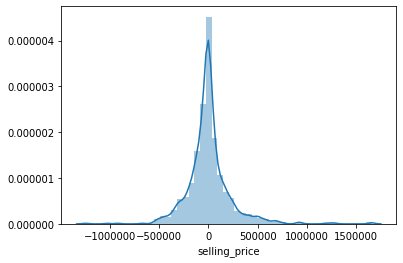

In [11]:
sns.distplot(y_test-predictions)

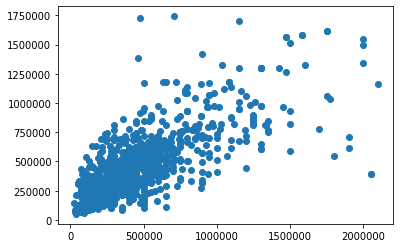

In [12]:
plt.scatter(y_test,predictions)

In [13]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 139071.37204879607
MSE: 50765842818.672356
RMSE: 225312.76665709016


#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### XGBoost

In [14]:
xgb = XGBRegressor()
xgb.fit(x_train , y_train)
print(xgb.score(x_test , y_test))
scores = cross_val_score(xgb , x , y , cv = 5)
print(scores.mean())

0.5785538133836214
0.5968212349160295


In [15]:
predictions=xgb.predict(x_test)

In [16]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 137367.57898612518
MSE: 50095532162.38492
RMSE: 223820.3122202829


#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### SVM

In [17]:
svr = SVR(kernel='rbf')
svr.fit(x_train , y_train)
print(svr.score(x_test , y_test))
scores = cross_val_score(svr , x , y , cv = 5)
print(scores.mean())

-0.07418377172321255
-0.07403752113380047


#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## KNN

In [18]:
krc = KNeighborsRegressor()
krc.fit(x_train , y_train)
krc.score(x_test , y_test)

0.30044439511641363

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
ln = LinearRegression()
ln.fit(x_train , y_train)
ln.score(x_test , y_test)

0.47913316868356726

### Overall Random Forest gives better accuracy compared to other models.

### Model  needs tuning because it is giving pretty low accuracy

### We will perform tuning on RandomForest to improve accuracy